In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [6]:
#resimlerdeki sayıların hangi sayı olduğunu tahmin etme 

In [7]:
train=pd.read_csv("train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test=pd.read_csv("test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
Y_train=train["label"]
X_train=train.drop(labels=["label"],axis=1)


label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

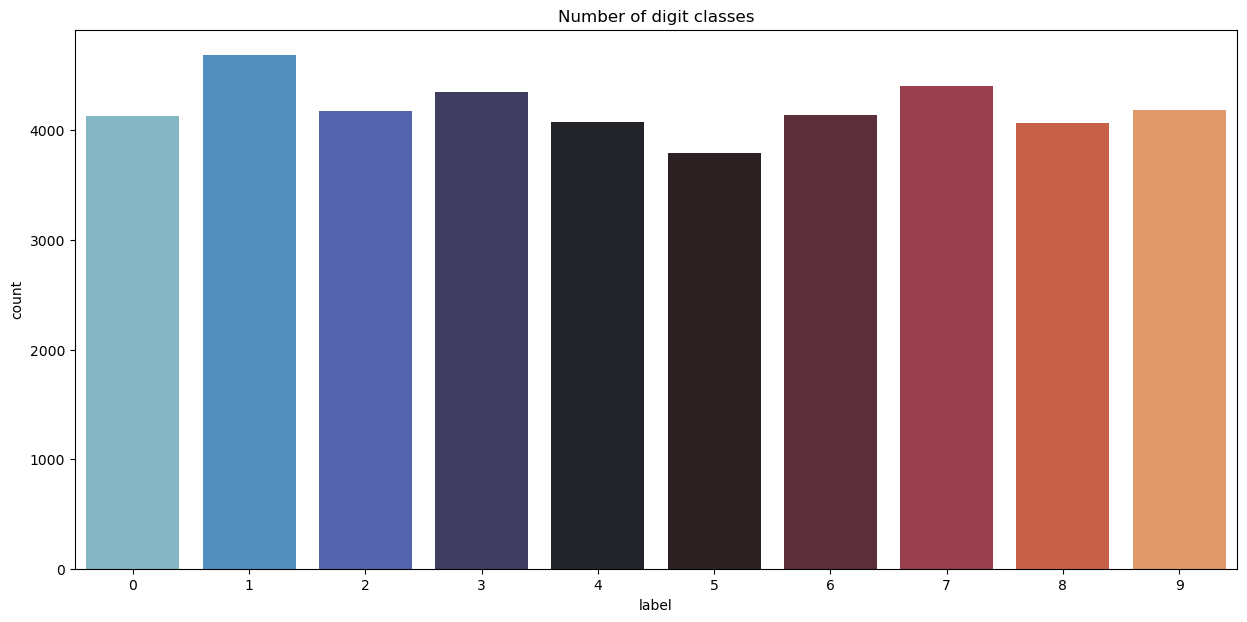

In [10]:
#resimlerdeki sayılardan kaçar tane olduğunu buluruz
plt.figure(figsize=(15,7))
g = sns.countplot(x=Y_train, palette="icefire")
plt.title("Number of digit classes")
Y_train.value_counts()

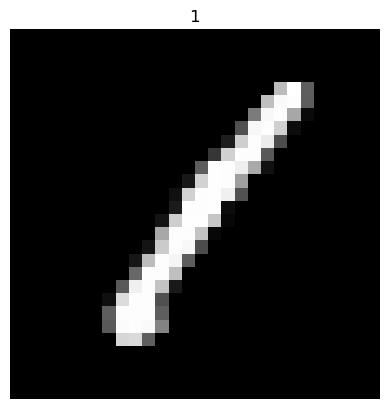

In [11]:
img=X_train.iloc[0].to_numpy()
img=img.reshape((28,28))#matrikse çevirdik
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")#eksenleri kapatır
plt.show()

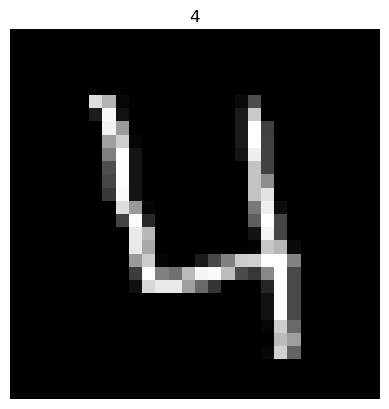

In [12]:
img=X_train.iloc[3].to_numpy()
img=img.reshape((28,28))#matrikse çevirdik
plt.imshow(img,cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("off")#eksenleri kapatır
plt.show()

In [13]:
#normalize tha data->resimleri 0-1 aralığındaki piksellere çeviririz (siyah beyaz tonları)
X_train=X_train/255.0
test=test/255.0
print("x_train shape",X_train.shape)
print("test shape",test.shape)

x_train shape (42000, 784)
test shape (28000, 784)


In [14]:
#reshape
X_train=X_train.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)
print("x_train shape",X_train.shape)
print("test shape",test.shape)

x_train shape (42000, 28, 28, 1)
test shape (28000, 28, 28, 1)


In [15]:
#label encoding-> 2=[0,0,1,0,0,0,0,0,0,0]
from tensorflow.keras.utils import to_categorical #convert to one-hot encoding 
Y_train=to_categorical(Y_train,num_classes=10)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.1,random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)



x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


In [17]:
#CNN  conv => max pool => dropout => conv => max pool => dropout => fully connected (2 layer)
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
model=Sequential() #yapı
#5*5 lik 8 filtre
model.add(Conv2D(filters=8,kernel_size=(5,5),padding="Same",activation="relu",input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=16,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation="relu"))#hidden layer değeri
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))#output layer

In [18]:
#define the optimizer
optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)#learning rate değişimini etileyen parametreler

In [19]:
#compile the model
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])#parçaları birleştirme

In [20]:
epochs=10
batch_size=250

In [21]:
#data augmentation ->yeniden üretme resimlerin farklı duruşlarna bakarız 
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.5, # Randomly zoom image 5%
        width_shift_range=0.5,  # randomly shift images horizontally 5%
        height_shift_range=0.5,  # randomly shift images vertically 5%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [22]:
# Fit the model
history = model.fit(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    epochs=epochs, validation_data=(X_val, Y_val),
                    steps_per_epoch=X_train.shape[0] // batch_size)
#her seferinde accuracy değerini verir

Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.1420 - loss: 2.2701 - val_accuracy: 0.3581 - val_loss: 1.8205
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2760 - loss: 2.0363 - val_accuracy: 0.3505 - val_loss: 1.8284
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.2863 - loss: 1.9638 - val_accuracy: 0.6210 - val_loss: 1.3038
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3400 - loss: 1.8491 - val_accuracy: 0.6133 - val_loss: 1.3102
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step - accuracy: 0.3804 - loss: 1.7561 - val_accuracy: 0.8050 - val_loss: 0.8257
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3880 - loss: 1.6185 - val_accuracy: 0.8043 - val_loss: 0.8275
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.4370 - loss: 1.6213 - val_accuracy: 0.8462 - val_loss: 0.6107
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5000 - loss: 1.4517 - val_accu

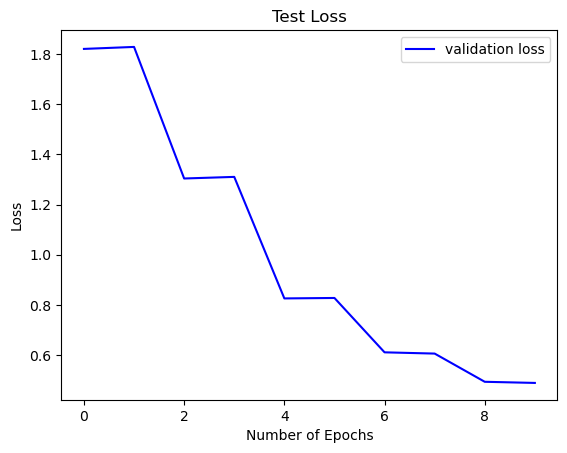

In [23]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Tahminler: modeli doğrulama veri seti üzerinde çalıştır
Y_pred = model.predict(X_val)

# Tahminleri sınıf etiketlerine dönüştür
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Gerçek etiketleri sınıf etiketlerine dönüştür
Y_true = np.argmax(Y_val, axis=1)

# Confusion matrix hesapla
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

print(confusion_mtx)


132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[397   0   0   0   0   3   1   2   7   1]
 [  0 468   4   4   0   1   2   2   1   3]
 [  5   0 296  39   2   8  19   7  26   1]
 [  1   0   1 387   0  11   0   5  11   2]
 [  3   1   0   0 380   0  44   3   2  28]
 [  4   1   4  29   0 314   2   0  16   2]
 [ 15   1   0   0   0   1 388   0   8   0]
 [  1   0   2  26   1   0   0 392   1  23]
 [  8   2   0   7   1  13   6   2 331  12]
 [ 15   1   0  10   8   2   0  17  15 341]]
